In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('data/spam.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [140]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [141]:
df.shape

(5572, 4)

In [142]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [143]:
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [144]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [145]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [146]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [147]:
data = ham.append(spam, ignore_index=True)
data.shape

(1494, 4)

In [148]:
data.head()

,label,message,length,punct
0,ham,Every King Was Once A Crying Baby And Every Gr...,143,4
1,ham,I'm in a movie. Call me 4 wat?,30,3
2,ham,Yes:)sura in sun tv.:)lol.,26,6
3,ham,"Sorry, I'll call later",22,2
4,ham,Just finished. Missing you plenty,33,1


In [149]:
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


## Exploratory Data Analysis

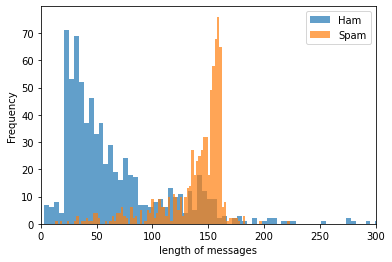

In [150]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('length of messages')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,300)
plt.show()

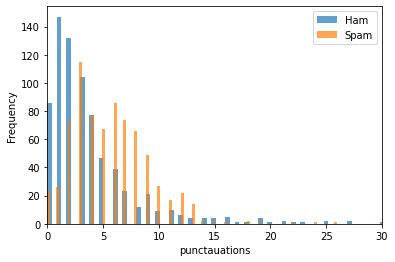

In [151]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('punctauations')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,30)
plt.show()

## Data Preparation

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [153]:
X = data['message']
y = data['label']

## CountVectorizer

In [154]:
# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data

In [155]:
X

<1494x4537 sparse matrix of type '<class 'numpy.int64'>'
	with 24886 stored elements in Compressed Sparse Row format>

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9676113360323887

In [157]:
text_to_predict = ["i'm planning to go to market, would ypu e interested to come",
"won $3000 click below link to proceed"]
vect = cv.transform(text_to_predict).toarray()
my_prediction = clf.predict(vect)
my_prediction

array(['ham', 'spam'], dtype='<U4')

In [158]:
#Save train Model
import joblib
import pickle

pickle.dump(clf, open('model/NB_countvector_spam_model.pickel', 'wb'))
pickle.dump(cv, open("model/NB_countvector_spam_vector.pickel", "wb"))

In [160]:
# load saved train model
NB_spam_model = open('model/NB_countvector_spam_model.pickel','rb')
clf = pickle.load(NB_spam_model)

# load saved vector

vectorizer = open("model/NB_countvector_spam_vector.pickel", "rb")
cv = pickle.load(vectorizer)

text_to_predict = ["i'm planning to go to market, would you be interested to come",
"won $3000 click below link to proceed"]
vect = cv.transform(text_to_predict)#.toarray()
my_prediction = clf.predict(vect)
my_prediction

array(['ham', 'spam'], dtype='<U4')